# Introduction 
Switched to contrastive loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json 
import h5py

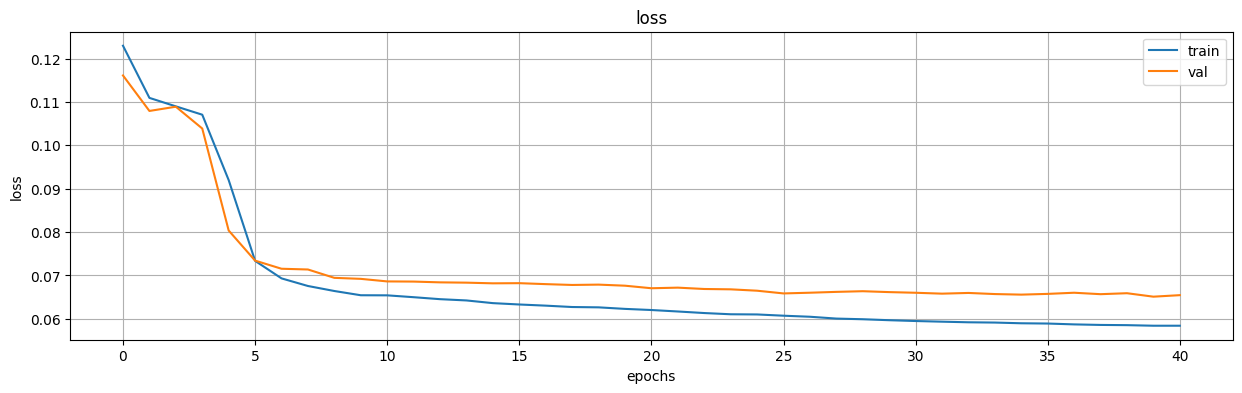

In [2]:
[4,8,16,24,32]
output_size = 32
i = 0
fn = "../Results/ADSB_contrast2/ADSB_{}/Res_{}/"


with open(fn.format(output_size,i)+"Training/training_history.json", "r") as f:
    h = json.load(f)

keys = ['loss']

for k in keys:
    plt.figure(figsize=(15, 4))
    plt.plot(h[k],label='train')
    plt.plot(h['val_'+k],label='val')
    plt.title(k)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.grid(True)
    plt.legend()
    plt.show()

# Extract threshold
We know the loss of the good samles, we know the loss of the negative samples. lets plot them togheter.
It might be better to create another dataset with unique messages. --> it is working to good now. 

In [3]:

# data = np.load(fn.format(output_size,i)+'Results/final.npy',allow_pickle=True).item()
data = np.load(fn.format(output_size,i)+'Training/threshold.npy',allow_pickle=True).item()

0.3336397826995403
0.045411948


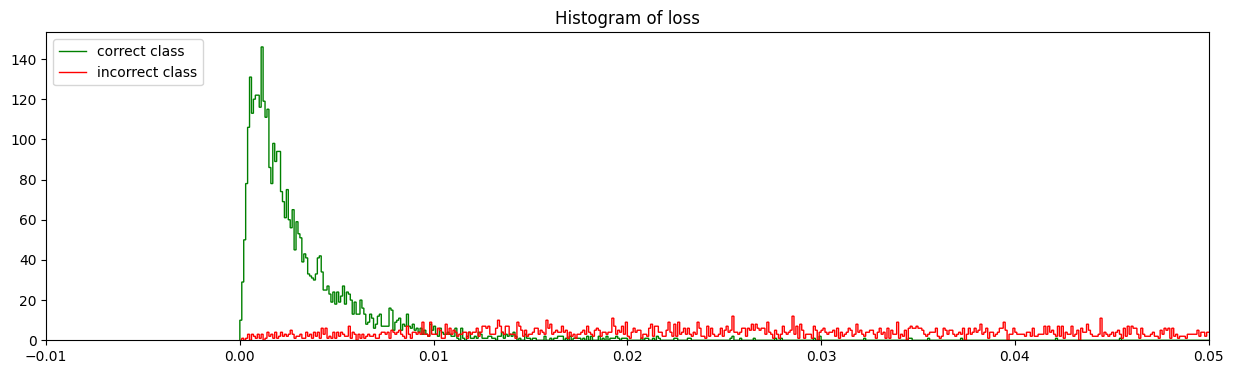

In [6]:

pos = data['Corr']>0.95
neg = data['Corr']<0.95
print(np.sum(pos)/len(pos))
print(np.max(data['Loss'][pos]))
# print(data)
# hist, bin_edges = np.histogram(data['POS'], density=True)
plt.figure(figsize=(15, 4))
counts, bins = np.histogram(data['Loss'][pos],bins=np.arange(0,2,0.0001))
plt.stairs(counts, bins,color='green',label='correct class')
counts, bins = np.histogram(data['Loss'][neg],bins=np.arange(0,2,0.0001))
plt.stairs(counts, bins,color='red',label='incorrect class')
plt.title("Histogram of loss")
plt.legend()
plt.xlim(-0.01,0.05)
plt.show()



In [9]:
def calc_acc(pos,neg,th):
    p = pos<th 
    n = neg>th
    pp = np.sum(p)/len(p)
    nn= np.sum(n)/len(n)
    pn=(np.sum(n)+np.sum(p))/(len(n)+len(p))
    return pn
# def calc_acc(pos,neg,th):
#     p = pos<th 
#     n = neg<th
#     pn=np.sum(p)/(np.sum(n)+np.sum(p))
#     return pn
print(np.percentile(data['Loss'][pos],99.99))


0.04412756893187586


4004 7961
0.9781027998328458 0.0106
0.9718345173422482


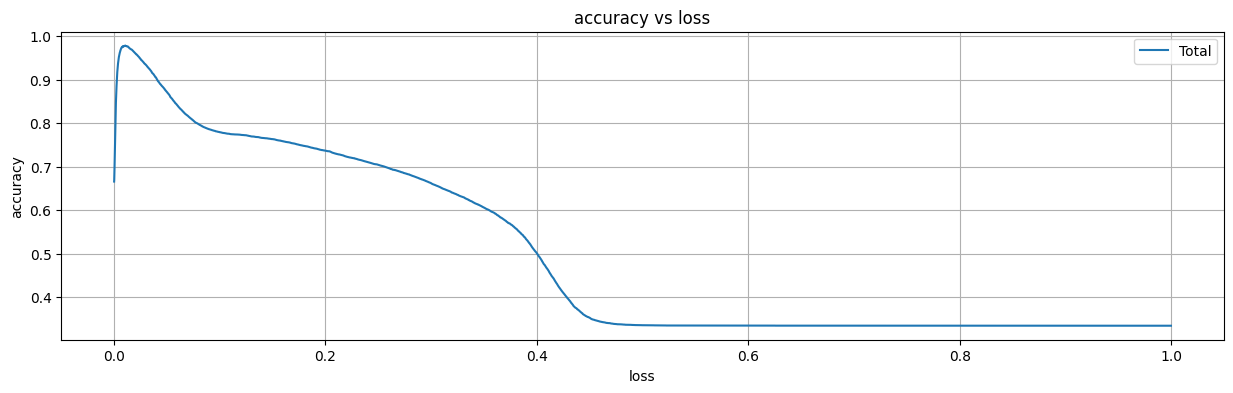

In [156]:
th_range = np.arange(0.0001,1,0.0001)
res = []
p = data['Loss'][pos]
n = data['Loss'][neg]
print(len(p),len(n))
for th in th_range:
    res.append(calc_acc(p,n,th))

res = np.array(res)
print(np.max(res),th_range[np.argmax(res)])
print(calc_acc(p,n,np.percentile(data['Loss'][pos],99)))

plt.figure(figsize=(15, 4))
plt.plot(th_range,res,label='Total')
# plt.plot(th_range,res[:,1],label='Positive')
# plt.plot(th_range,res[:,2],label='Negative')

plt.title('accuracy vs loss')
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
# Which metric should I use?
# take th to have 99 percent of the good samples
# what is the nr good/ total samples 
# Number of correct 

th = np.percentile(data['Loss'][pos],50)
pos2 = p<th
neg2 = n<th

print(np.sum(pos2)/(np.sum(pos2)+np.sum(neg2)))

0.7204030226700252


## Validation


0.33600802407221664
0.89848244


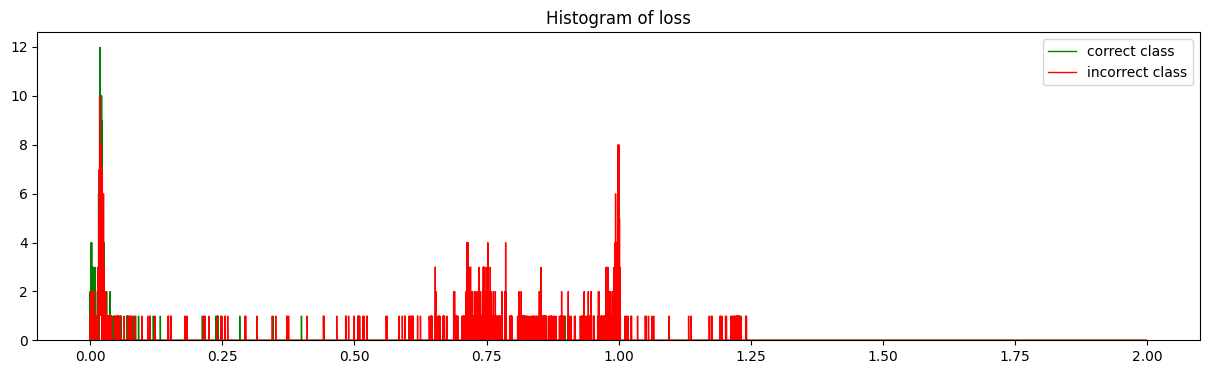

0.24102220773696895
670 1324
0.7647943831494484 0.044550000000000006
(0.7577733199598796, 0.9, 0.6858006042296072)


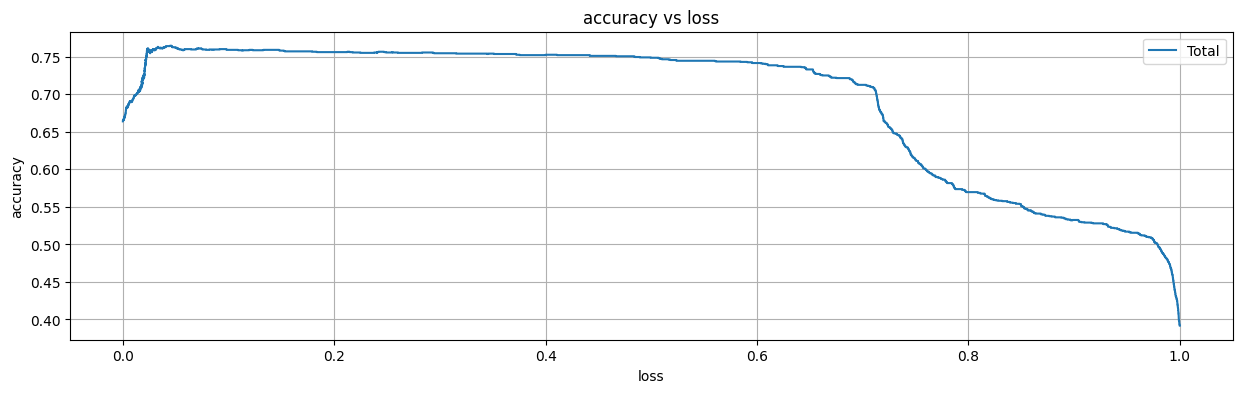

In [84]:

# data = np.load(fn.format(output_size,i)+'Results/final.npy',allow_pickle=True).item()
data = np.load(fn.format(output_size,i)+'Training/threshold_val.npy',allow_pickle=True).item()

pos = data['Corr']>0.90
neg = data['Corr']<0.90
print(np.sum(pos)/len(pos))
print(np.max(data['Loss'][pos]))
# print(data)
# hist, bin_edges = np.histogram(data['POS'], density=True)
plt.figure(figsize=(15, 4))
counts, bins = np.histogram(data['Loss'][pos],bins=np.arange(0,2,0.0001))
plt.stairs(counts, bins,color='green',label='correct class')
counts, bins = np.histogram(data['Loss'][neg],bins=np.arange(0,2,0.0001))
plt.stairs(counts, bins,color='red',label='incorrect class')
plt.title("Histogram of loss")
plt.legend()
# plt.xlim(-0.01,0.125)
plt.show()
def calc_acc(pos,neg,th):
    p = pos<th 
    n = neg>th
    pp = np.sum(p)/len(p)
    nn=np.sum(n)/len(n)
    pn=(np.sum(n)+np.sum(p))/(len(n)+len(p))
    return pn,pp,nn
print(np.percentile(data['Loss'][pos],99))

th_range = np.arange(0,1,0.00001)
res = []
p = data['Loss'][pos]
n = data['Loss'][neg]
print(len(p),len(n))
for th in th_range:
    res.append(calc_acc(p,n,th))

res = np.array(res)
print(np.max(res[:,0]),th_range[np.argmax(res[:,0])])
print(calc_acc(p,n,np.percentile(data['Loss'][pos],90)))

plt.figure(figsize=(15, 4))
plt.plot(th_range,res[:,0],label='Total')
# plt.plot(th_range,res[:,1],label='Positive')
# plt.plot(th_range,res[:,2],label='Negative')

plt.title('accuracy vs loss')
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Results on the influence of the number of considered fearures 
Read all the accuracies and make some datapoints. 
compression factor= 512*2/nr_featrues


In [169]:
class Result:
    def __init__(self,outputsize=2, avg=True) -> None:
        self.count=8
        self.output_size = outputsize
        self.fn=f'../Results/ADSB_contrast2/ADSB_{outputsize}'+'/Res_{}/Results/info'
        self.accuracy,self.maximum = self.get_avg_acc() if avg else self.get_max_acc()
    
    def get_avg_acc(self):
        res = 0
        c = 0
        for i in range(self.count):
            with open(self.fn.format(i), "r") as outfile:
                info =  json.load(outfile)
                res+=info['acc']
                c+=1
        return res/c, -1
    
    def get_max_acc(self):
        res = 0
        ires = -1
        for i in range(self.count):
            with open(self.fn.format(i), "r") as outfile:
                info =  json.load(outfile)
                if info['acc']>res:
                    res = info['acc']
                    ires = i
                
        return res,ires


r = Result(8)
print(r.accuracy)
print(r.maximum)

0.7018236668152327
-1


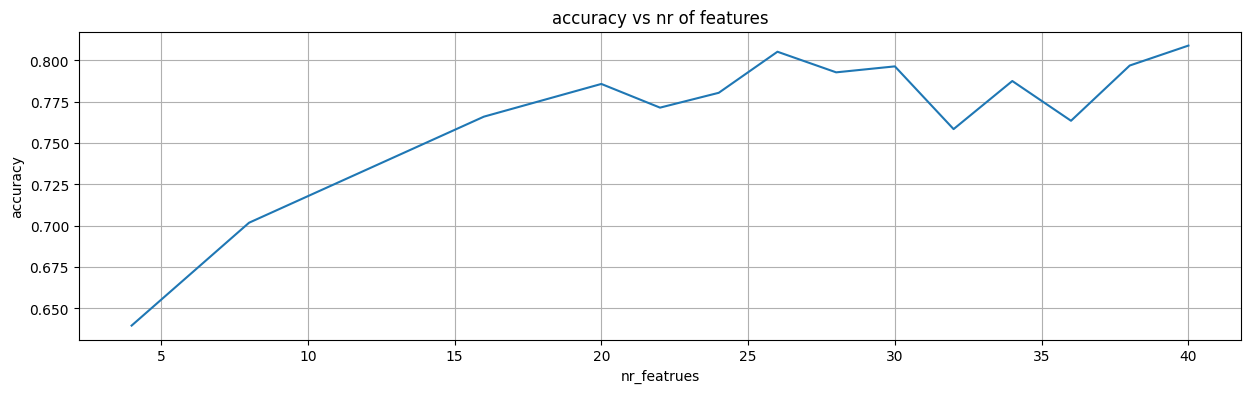

In [171]:
sizes = [4,8,16,20,22,24,26,28,30,32,34,36,38,40]

resc = [Result(s) for s in sizes]

res = [r.accuracy for r in resc]

plt.figure(figsize=(15, 4))
plt.plot(sizes,res)

plt.title('accuracy vs nr of features')
plt.xlabel('nr_featrues')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

[(4, 6), (8, 0), (16, 0), (20, 6), (22, 2), (24, 2), (26, 7), (28, 5), (30, 1), (32, 6), (34, 3), (36, 2), (38, 6), (40, 7)]


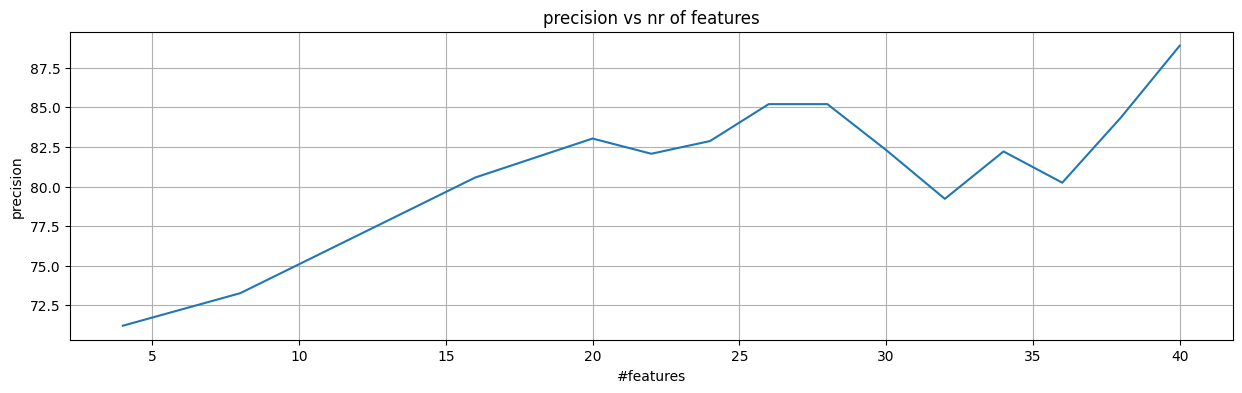

In [175]:
sizes = [4,8,16,20,22,24,26,28,30,32,34,36,38,40]

resc = [Result(s,avg=False) for s in sizes]

res = [r.accuracy*100 for r in resc]
print([(s,r.maximum) for s,r in zip(sizes,resc)])
plt.figure(figsize=(15, 4))
plt.plot(sizes,res)

plt.title('precision vs nr of features')
plt.xlabel('#features')
plt.ylabel('precision')
plt.grid(True)
plt.show()